# Common Task 1
# Tensorflow

In [1]:
import numpy as np
import h5py
import tensorflow as tf
import tensorflow_addons as tfa
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import math
import pandas as pd
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

In [2]:
%cd "C:\Users\siddh\Downloads"
hf = h5py.File('SinglePhotonPt50_IMGCROPS_n249k_RHv1.hdf5', 'r')

C:\Users\siddh\Downloads


In [3]:
hf.keys()

<KeysViewHDF5 ['X', 'y']>

In [4]:
n1 = hf.get('X')
n1 = np.array(n1,dtype='float32')
n1.shape

(249000, 32, 32, 2)

In [5]:
hf1 = h5py.File('SingleElectronPt50_IMGCROPS_n249k_RHv1.hdf5', 'r')

In [6]:
hf1.keys()

<KeysViewHDF5 ['X', 'y']>

In [7]:
n2 = hf1.get('X')
n2 = np.array(n2)
n2.shape

(249000, 32, 32, 2)

In [8]:
dd = np.row_stack((n2,n1))
dd.shape

(498000, 32, 32, 2)

In [9]:
dl = np.hstack(([0]*249000,[1]*249000))
dl.shape

(498000,)

In [10]:
dl

array([0, 0, 0, ..., 1, 1, 1])

In [11]:
def unison_shuffled_copies(a, b):
    assert len(a) == len(b)
    p = np.random.permutation(len(a))
    return a[p], b[p]

In [12]:
dsd, dsl = unison_shuffled_copies(dd,dl)

In [13]:
dsd.shape , dsl.shape

((498000, 32, 32, 2), (498000,))

In [14]:
import pandas as pd

In [15]:
# Splitted into train and validation dataset (validation data is used then for testing)
train_matrix, test_matrix, train_labels, test_labels = train_test_split(dsd[:300000], 
                                                                        dsl[:300000],
                                                                        test_size = 0.1,     # use 10 percent data
                                                                        random_state = 42) 

In [16]:
len(train_matrix), len(test_matrix), len(train_labels), len(test_labels)

(270000, 30000, 270000, 30000)

In [17]:
train_matrix.shape

(270000, 32, 32, 2)

In [18]:
train_labels = train_labels.reshape(-1,1)

In [19]:
import matplotlib.pyplot as plt

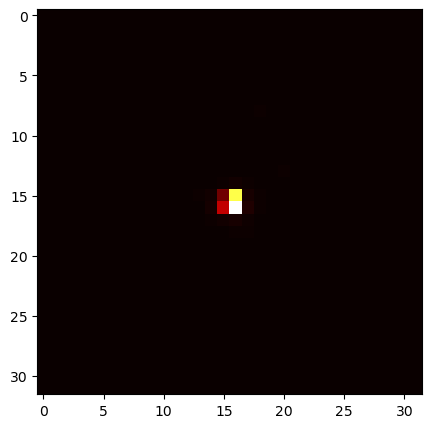

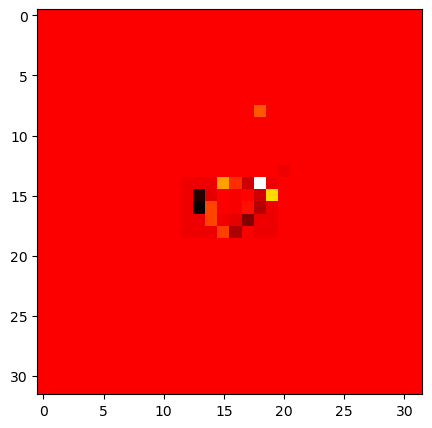

In [20]:
plt.figure(figsize=(5,5))
plt.imshow(dsd[100,:,:,0],cmap="hot")
plt.figure(figsize=(5,5))
plt.imshow(dsd[100,:,:,1],cmap="hot")
plt.show();

In [21]:
datagen = ImageDataGenerator()    

In [23]:
modeltt = tf.keras.Sequential([
  Conv2D(30, 2, padding='valid', activation='relu'),
  MaxPool2D(),
  Conv2D(60, 2, padding='valid', activation='relu'),
  Conv2D(90, 2, padding='valid', activation='relu'),
  Conv2D(60, 2, padding='valid', activation='relu'),
  Conv2D(30, 2, padding='valid', activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(50, activation='relu'),
  Dense(25, activation='relu'),
  Dense(1, activation = "sigmoid")
])


optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0006995)
  
modeltt.compile(loss="binary_crossentropy",
              optimizer=optimizer,
              metrics=["accuracy"])

initial_learning_rate = 0.0003451
def lr_step_decay(epoch, lr):
    drop_rate = 1.1
    epochs_drop = 20
    return initial_learning_rate * math.pow(drop_rate, math.floor(epoch/epochs_drop))

historytt = modeltt.fit(datagen.flow(train_matrix, train_labels, batch_size=512,shuffle = True,seed=42), 
                        epochs=150, 
                        verbose = 1,
                        callbacks=[tf.keras.callbacks.LearningRateScheduler(lr_step_decay, verbose=1)],
                        validation_data=datagen.flow(test_matrix, test_labels, batch_size=512,shuffle=True,seed=42))



Epoch 1: LearningRateScheduler setting learning rate to 0.0003451.
Epoch 1/150


C:\Users\siddh\anaconda3\envs\tf_gpu\lib\site-packages\keras\preprocessing\image.py:766: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3, or 4 channels on axis 3. However, it was passed an array with shape (270000, 32, 32, 2) (2 channels).
  warnings.warn(
C:\Users\siddh\anaconda3\envs\tf_gpu\lib\site-packages\keras\preprocessing\image.py:766: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3, or 4 channels on axis 3. However, it was passed an array with shape (30000, 32, 32, 2) (2 channels).
  warnings.warn(


528/528 [==============================] - 11s 20ms/step - loss: 0.6595 - accuracy: 0.6051 - val_loss: 0.6508 - val_accuracy: 0.6173 - lr: 3.4510e-04

Epoch 2: LearningRateScheduler setting learning rate to 0.0003451.
Epoch 2/150
528/528 [==============================] - 10s 19ms/step - loss: 0.6457 - accuracy: 0.6254 - val_loss: 0.6464 - val_accuracy: 0.6205 - lr: 3.4510e-04

Epoch 3: LearningRateScheduler setting learning rate to 0.0003451.
Epoch 3/150
528/528 [==============================] - 10s 19ms/step - loss: 0.6344 - accuracy: 0.6415 - val_loss: 0.6274 - val_accuracy: 0.6471 - lr: 3.4510e-04

Epoch 4: LearningRateScheduler setting learning rate to 0.0003451.
Epoch 4/150
528/528 [==============================] - 10s 19ms/step - loss: 0.6184 - accuracy: 0.6627 - val_loss: 0.6170 - val_accuracy: 0.6628 - lr: 3.4510e-04

Epoch 5: LearningRateScheduler setting learning rate to 0.0003451.
Epoch 5/150
528/528 [==============================] - 10s 19ms/step - loss: 0.6057 - accura

In [24]:
def calculate_results(y_true, y_pred):
    """
    Calculate model's accuracy, precision, recall and f1 score of a binary classification model.
    """
    # Calculate accuracy
    model_accuracy = accuracy_score(y_true, y_pred)*100
    # Calculate model precision, recall and f1-score using "weightd average"
    model_precision, model_recall, model_f1, __ = precision_recall_fscore_support(y_true, y_pred, average = "weighted")    # weighted average is good in the case when there is label imbalance
    model_results = {"accuracy": model_accuracy,
                     "precision": model_precision,
                     "recall": model_recall,
                     "f1": model_f1}
    return model_results

In [30]:
predstt = modeltt.predict(datagen.flow(train_matrix, train_labels, batch_size=512, shuffle=False))

528/528 [==============================] - 7s 12ms/step


In [32]:
predstt = np.array(tf.round(predstt), dtype = 'int').reshape(-1,)

In [35]:
resultstt = calculate_results(y_true=train_labels,y_pred=predstt)
resultstt

{'accuracy': 81.06333333333333,
 'precision': 0.8107047848246909,
 'recall': 0.8106333333333333,
 'f1': 0.8106250612025592}

In [38]:
from sklearn.metrics import roc_auc_score
restt = roc_auc_score(train_labels,predstt)
restt

0.8106435284707729

In [39]:
modeltt.save("commontask1_tf")

INFO:tensorflow:Assets written to: commontask1_tf\assets


INFO:tensorflow:Assets written to: commontask1_tf\assets


# Pytorch

In [40]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

print("Libraries imported - ready to use PyTorch", torch.__version__)

Libraries imported - ready to use PyTorch 2.0.0+cpu


In [41]:
def train(model, device, train_loader, optimizer, epoch):
    # Set the model to training mode
    model.train()
    train_loss = 0
    print("Epoch:", epoch)
    # Process the images in batches
    for batch_idx, (data, target) in enumerate(train_loader):
        # Use the CPU or GPU as appropriate
        # Recall that GPU is optimized for the operations we are dealing with
        data, target = data.to(device), target.to(device)
        
        # Reset the optimizer
        optimizer.zero_grad()
        
        # Push the data forward through the model layers
        output = model(data)
        
        # Get the loss
        loss = loss_criteria(output, target)

        # Keep a running total
        train_loss += loss.item()
        
        # Backpropagate
        loss.backward()
        optimizer.step()
        
        # Print metrics so we see some progress
        print('\tTraining batch {} Loss: {:.6f}'.format(batch_idx + 1, loss.item()))
            
    # return average loss for the epoch
    avg_loss = train_loss / (batch_idx+1)
    print('Training set: Average loss: {:.6f}'.format(avg_loss))
    return avg_loss

In [42]:
def test(model, device, test_loader):
    # Switch the model to evaluation mode (so we don't backpropagate or drop)
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        batch_count = 0
        for data, target in test_loader:
            batch_count += 1
            data, target = data.to(device), target.to(device)
            
            # Get the predicted classes for this batch
            output = model(data)
            
            # Calculate the loss for this batch
            test_loss += loss_criteria(output, target).item()
            
            # Calculate the accuracy for this batch
            _, predicted = torch.max(output.data, 1)
            correct += torch.sum(target==predicted).item()

    # Calculate the average loss and total accuracy for this epoch
    avg_loss = test_loss / batch_count
    print('Validation set: Average loss: {:.6f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        avg_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))
    
    # return average loss for the epoch
    return avg_loss

In [48]:
torch.cuda.is_available()

False

In [53]:
x = torch.tensor(np.moveaxis(train_matrix[:40000],-1,1), dtype=torch.float32)
y = torch.tensor(train_labels[:40000], dtype=torch.float32).reshape(-1, 1)
xt = torch.tensor(np.moveaxis(test_matrix[:500],-1,1), dtype=torch.float32)
yt = torch.tensor(test_labels[:500], dtype=torch.float32).reshape(-1, 1)

In [54]:

import copy
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import tqdm
 
def model_train(model, X_train, y_train, X_val, y_val):
    # loss function and optimizer
    loss_fn = nn.BCELoss()  # binary cross entropy
    optimizer = optim.Adam(model.parameters(), lr=0.0005891)
 
    n_epochs = 30   # number of epochs to run
    batch_size = 200  # size of each batch
    batch_start = torch.arange(0, len(X_train), batch_size)
 
    # Hold the best model
    best_acc = - np.inf   # init to negative infinity
    best_weights = None
 
    for epoch in range(n_epochs):
        model.train()
        with tqdm.tqdm(batch_start, unit="batch", mininterval=0, disable=True) as bar:
            bar.set_description(f"Epoch {epoch}")
            for start in bar:
                # take a batch
                X_batch = X_train[start:start+batch_size]
                y_batch = y_train[start:start+batch_size]
                # forward pass
                y_pred = model(X_batch)
                loss = loss_fn(y_pred, y_batch)
                # backward pass
                optimizer.zero_grad()
                loss.backward()
                # update weights
                optimizer.step()
                # print progress
                acc = (y_pred.round() == y_batch).float().mean()
                bar.set_postfix(
                    loss=float(loss),
                    acc=float(acc)
                )
        # evaluate accuracy at end of each epoch
        model.eval()
        y_pred = model(X_val)
        acc = (y_pred.round() == y_val).float().mean()
        acc = float(acc)
        if acc > best_acc:
            best_acc = acc
            best_weights = copy.deepcopy(model.state_dict())
    # restore model and return best accuracy
    model.load_state_dict(best_weights)
    return best_acc

In [55]:
## KAGGLE 

# Create a neural net class
class Net(nn.Module):
    
    
    # Defining the Constructor
    def __init__(self, num_classes=2):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=2, out_channels=50, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(in_channels=50, out_channels=75, kernel_size=3, stride=1, padding=1)
        self.conv3 = nn.Conv2d(in_channels=75, out_channels=100, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2)
        self.drop = nn.Dropout2d(p=0.2)
        self.fc1 = nn.Linear(in_features=16* 16 * 100, out_features=200)
        self.fc2 = nn.Linear(in_features=200, out_features=100) 
        self.fc3 = nn.Linear(in_features=100, out_features=50)
        self.fc4 = nn.Linear(in_features=50, out_features=1)
        

    def forward(self, x):
        # In the forward function, pass the data through the layers we defined in the init function
        # Use a ReLU activation function after layer 1 (convolution 1 and pool)
        x = F.relu(self.conv1(x)) 
        x = F.relu(self.conv2(x)) 
        x = F.relu(self.pool(self.conv3(x)))  
        x = torch.flatten(x,start_dim=1)
        # Feed to fully-connected layer to predict class
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))      
        x=self.fc4(x)
        
        # Return class probabilities via a sigmoid function 
        return F.sigmoid(x)
    
device = "cpu"
if (torch.cuda.is_available()):
    # if GPU available, use cuda (on a cpu, training will take a considerable length of time!)
    device = "cuda"

# Create an instance of the model class and allocate it to the device
model = Net(num_classes=2).to(device)

print(model)

Net(
  (conv1): Conv2d(2, 50, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(50, 75, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(75, 100, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (drop): Dropout2d(p=0.2, inplace=False)
  (fc1): Linear(in_features=25600, out_features=200, bias=True)
  (fc2): Linear(in_features=200, out_features=100, bias=True)
  (fc3): Linear(in_features=100, out_features=50, bias=True)
  (fc4): Linear(in_features=50, out_features=1, bias=True)
)


In [56]:
model = Net()

In [57]:
result = model_train(model,x,y,xt,yt)
result

0.6240000128746033

In [174]:
torch.save(model.state_dict(),'commontask1_torch')

# Specific Task: Vision Transformer

In [58]:
image_size = 32           # We'll resize input images to this size
patch_size = 2             # Size of the patches to be extract from the input images
num_patches = (image_size // patch_size) ** 2
projection_dim = 64
num_heads = 4
transformer_units = [
    projection_dim * 2,
    projection_dim,
]                              # Size of the transformer layers
transformer_layers = 8

In [59]:
class Patches(tf.keras.layers.Layer):
    def __init__(self, patch_size):
        super().__init__()
        self.patch_size = patch_size

    def call(self, images):
        batch_size = images.shape[0]
        patches = tf.image.extract_patches(
            images=images,
            sizes=[1,self.patch_size, self.patch_size,1],
            strides=[1,self.patch_size, self.patch_size,1],
            rates=[1,1,1,1],
            padding="VALID",
        )
        patch_dims = patches.shape[-1]
        patches = tf.reshape(patches, [batch_size, -1, patch_dims])
        return patches

In [60]:
class PatchEncoder(tf.keras.layers.Layer):
    def __init__(self, num_patches, projection_dim):
        super().__init__()
        self.num_patches = num_patches
        self.projection = tf.keras.layers.Dense(units=projection_dim)
        self.position_embedding = tf.keras.layers.Embedding(
            input_dim=num_patches, output_dim=projection_dim
        )

    def call(self, patch):
        positions = tf.range(start=0, limit=self.num_patches, delta=1)
        encoded = self.projection(patch) + self.position_embedding(positions)
        return encoded

In [147]:
class BaseAttention(tf.keras.layers.Layer):
    def __init__(self, **kwargs):
        super().__init__()
        self.mha = tf.keras.layers.MultiHeadAttention(**kwargs)
        self.lay_norm = tf.keras.layers.LayerNormalization()
        self.add = tf.keras.layers.Add()
        self.fc1 = tf.keras.layers.Dense(1280,activation="relu")
        self.fc2 = tf.keras.layers.Dense(64,activation="relu")        

In [148]:
class vit(BaseAttention):
    def call(self,inputs):
        inputs = tf.expand_dims(tf.squeeze(inputs,axis=0),axis=0)
        # Create patches.
        patches = Patches(patch_size)(inputs)
        # Encode patches.
        encoded_patches = PatchEncoder(num_patches, projection_dim)(patches)
        for _ in range(12):
            lay_normed = self.lay_norm(encoded_patches)
            msar = self.mha(lay_normed,lay_normed)
            added = self.add([msar,encoded_patches])
            lay_normed2 = self.lay_norm(added)
            act = tf.keras.activations.gelu(lay_normed2)
            fc1 = self.fc1(act)
            fc2 = self.fc2(fc1)
            encoded_patches = self.add([fc2,added])
        return inputs

In [149]:
vit = vit(num_heads=4, key_dim=64)

In [150]:
class layer():
    def layer(self,inputs):
        x = tf.keras.layers.LayerNormalization()(inputs)
        x = tf.keras.activations.tanh(x)
        x = tf.keras.layers.Flatten()(x)
        return x

In [151]:
layer = layer()

In [166]:
def build_model():    
    inputs = tf.keras.Input(shape = (32,32,2))
    print(inputs.shape)
    x = vit.call(inputs)
    x = layer.layer(x)
    print(x.shape)
    outputs = tf.keras.layers.Dense(units=1, activation='sigmoid')(x)
    print(outputs.shape)

    model = tf.keras.Model(inputs, outputs)
    
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=
                                                    0.007), 
                   loss= "binary_crossentropy", 
                   metrics=["accuracy"])
    global lr_scheduler
    lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4*10**(epoch/20))
    
    return model

In [167]:
model_vit = build_model()
model_vit.summary()

(None, 32, 32, 2)
(1, 2048)
(1, 1)
Model: "model_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_16 (InputLayer)       [(None, 32, 32, 2)]       0         
                                                                 
 tf.compat.v1.squeeze_15 (TF  (32, 32, 2)              0         
 OpLambda)                                                       
                                                                 
 tf.expand_dims_15 (TFOpLamb  (1, 32, 32, 2)           0         
 da)                                                             
                                                                 
 layer_normalization_18 (Lay  (1, 32, 32, 2)           4         
 erNormalization)                                                
                                                                 
 tf.math.tanh_13 (TFOpLambda  (1, 32, 32, 2)           0         
 )                     

In [123]:
train_data = np.array(train_matrix)
valid_data = np.array(test_matrix)

In [124]:
np.array(train_data).shape, train_labels.shape

((270000, 32, 32, 2), (270000, 1))

In [168]:
history_vit = model_vit.fit(datagen.flow(train_data[:1000], train_labels[:1000], batch_size=1,shuffle = False), 
                    epochs=50, 
                    verbose = 1,
#                     callbacks=[lr_scheduler],
                   validation_data=datagen.flow(valid_data[:100], test_labels[:100], batch_size=1,shuffle=False))

Epoch 1/50
1000/1000 [==============================] - 3s 2ms/step - loss: 0.7074 - accuracy: 0.5450 - val_loss: 0.7192 - val_accuracy: 0.5300
Epoch 2/50
1000/1000 [==============================] - 2s 2ms/step - loss: 0.6441 - accuracy: 0.6330 - val_loss: 0.7803 - val_accuracy: 0.5100
Epoch 3/50
1000/1000 [==============================] - 2s 2ms/step - loss: 0.5772 - accuracy: 0.6860 - val_loss: 0.9927 - val_accuracy: 0.5200
Epoch 4/50
1000/1000 [==============================] - 2s 2ms/step - loss: 0.5545 - accuracy: 0.7160 - val_loss: 1.0296 - val_accuracy: 0.4900
Epoch 5/50
1000/1000 [==============================] - 2s 2ms/step - loss: 0.5179 - accuracy: 0.7410 - val_loss: 0.9593 - val_accuracy: 0.4800
Epoch 6/50
1000/1000 [==============================] - 2s 2ms/step - loss: 0.4875 - accuracy: 0.7630 - val_loss: 1.2163 - val_accuracy: 0.5200
Epoch 7/50
1000/1000 [==============================] - 2s 2ms/step - loss: 0.4778 - accuracy: 0.7690 - val_loss: 1.1372 - val_accuracy:

In [171]:
preds_vit = model_vit.predict(datagen.flow(train_matrix[:1000], train_labels[:1000], batch_size=1, shuffle=False))
preds_vit = np.array(tf.round(preds_vit), dtype = 'int').reshape(-1,)
results_vit = calculate_results(y_true=train_labels[:1000],y_pred=preds_vit)
results_vit

 145/1000 [===>..........................] - ETA: 1s

C:\Users\siddh\anaconda3\envs\tf_gpu\lib\site-packages\keras\preprocessing\image.py:766: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3, or 4 channels on axis 3. However, it was passed an array with shape (1000, 32, 32, 2) (2 channels).
  warnings.warn(


1000/1000 [==============================] - 1s 869us/step


{'accuracy': 94.89999999999999,
 'precision': 0.9522253619396477,
 'recall': 0.949,
 'f1': 0.9488345945945946}

In [172]:
res_vit = roc_auc_score(train_labels[:1000],preds_vit)
res_vit

0.9475703119994875

In [173]:
model_vit.save('vit')

INFO:tensorflow:Assets written to: vit\assets


INFO:tensorflow:Assets written to: vit\assets
